In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results_df = mouse_metadata.merge(study_results, how = "outer", on = "Mouse ID")

# Display the data table for preview
mouse_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
#Checking the number of mice
Nu_mice = mouse_results_df["Mouse ID"].nunique()

print(f"There are {Nu_mice} mice included in the study.")

There are 249 mice included in the study.


In [3]:
#Finding and displaying the duplicated data, based on Mouse ID and Timepoint
dupl_mouse = mouse_results_df[mouse_results_df.duplicated(subset = ["Mouse ID", "Timepoint"])]
dupl_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
#Displaying all the data for the duplicate Mouse ID
mouse_results_df.loc[mouse_results_df["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
#Clean the data frame by dropping the Mouse ID that has duplicated entries
mouse_results_cl = mouse_results_df[mouse_results_df["Mouse ID"] != "g989"]
mouse_results_cl.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
#Display the number of mice in the cleaned data frame (the number has gone from 249 to 248)
Nu_mice_cl = mouse_results_cl["Mouse ID"].nunique()
print(f"There are {Nu_mice_cl} mice in the cleaned data set.")

There are 248 mice in the cleaned data set.


## Summary Statistics

In [7]:
#Group the Tumor Volume (mm3) data by Drug Regimen
regimen_results_df = mouse_results_cl.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]

In [8]:
#Summary statistics using scipy

mean_scipy = regimen_results_df.mean()

median_scipy = regimen_results_df.median()

var_scipy = regimen_results_df.var()

std_scipy = regimen_results_df.std()

sem_scipy = regimen_results_df.sem()

sum_stat_scipy = pd.DataFrame({"Mean": mean_scipy,
                                  "Median": median_scipy,
                                  "Variance": var_scipy,
                                  "Std. Dev": std_scipy,
                                  "SEM": sem_scipy})
sum_stat_scipy

,Mean,Median,Variance,Std. Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
#Summary statistics using aggregation
sum_stats_agg = regimen_results_df.agg(["mean", "median", "var", "std", "sem"])

sum_stats_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
unique_info = mouse_results_cl.nunique()
unique_info

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64

## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Timepoints per Drug Regimen'}, xlabel='Drug Regimen', ylabel='No. of Timepoints'>

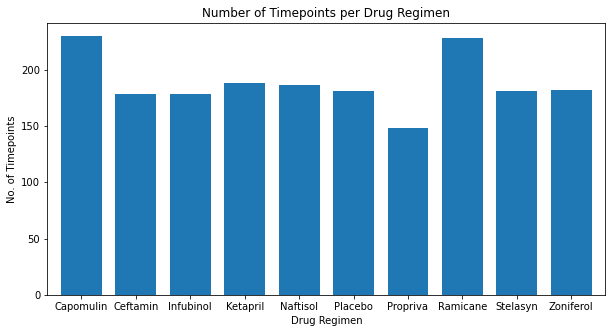

In [16]:
#Filter the data frame to only the columns needed
regimen_and_timepoint = mouse_results_cl[["Drug Regimen", "Timepoint"]]

#groupby and count to calculate the number of timepoint entries per drug regimen
regimen_and_timepoint = regimen_and_timepoint.groupby(["Drug Regimen"]).count()

#Formatting info for Dataframe.plot() bar plot
title = "Number of Timepoints per Drug Regimen"
xlabel = "Drug Regimen"
ylabel = "No. of Timepoints"

# Use DataFrame.plot() to create a bar chart
regimen_and_timepoint.plot(kind = "bar", figsize = (10,5), rot = 0, title = title, xlabel = xlabel, ylabel = ylabel, width = .75, legend = None)

Text(0, 0.5, 'No. of Timepoints')

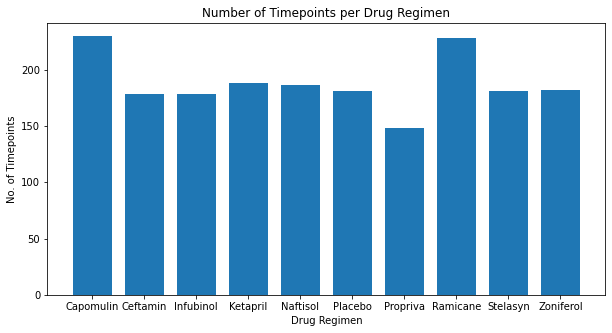

In [17]:
#Set x-axis format information
x_axis = np.arange(len(regimen_and_timepoint))
x_names = regimen_and_timepoint.index.unique()
tick_locations = [value for value in x_axis]

#Create empty bar plot with Matplotlib
plt.figure(figsize=(10, 5))

#Add data and formatting to bar plot
plt.bar(x_axis, regimen_and_timepoint["Timepoint"], align="center", width = .75)
plt.xticks(tick_locations, x_names, rotation="0")
plt.title("Number of Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("No. of Timepoints")